# Ford Go Bike Data Exploration
## by Touiti MARIE-BORNAND

## Investigation Overview
In this investigation, I wanted to answer those three questions:
* What are the most popular bike trips?
* Does the people that use this bike sharing service share similar characteristics?
* Is there a relationship between the bike user and his trip?

## Dataset Overview
Ford Go Bike was a bicycle sharing system in the San Francisco Bay Area, California (USA). The data consists of information regarding trip data for 2017 including trip duration, start/end time and date, and other trip characteristics. The dataset is a csv file called `2017-fordgobike-tripdata.csv` and can be found [here](https://www.lyft.com/bikes/bay-wheels/system-data). 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
trips = pd.read_csv('2017-fordgobike-tripdata.csv')

## What is the most popular bike trip?

The most popular bike trip starts from San Francisco Ferry Building and ends in San Francisco Caltrain between 5.00 and 6.00pm. It will most likely take 600 seconds (10 minutes).

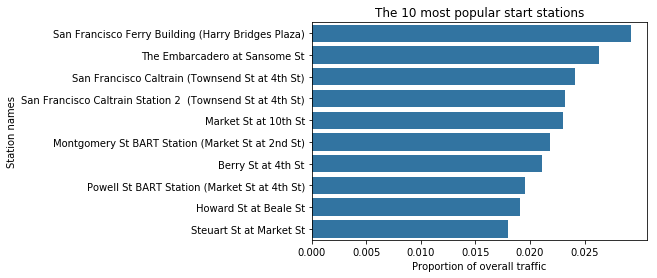

In [12]:
# create a bar chart with relative frequency for start_station_name focusing on the 10 stations most used 

# get proportion taken by most common group for derivation of tick marks
base_color = sb.color_palette()[0]
n_points = trips.shape[0]
max_count = trips['start_station_name'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

# create the plot
cat_order = trips['start_station_name'].value_counts().nlargest(10).index
sb.countplot(data = trips, y = 'start_station_name', color = base_color, order = cat_order)
plt.xticks(tick_props * n_points, tick_names)
plt.title('The 10 most popular start stations')
plt.xlabel('Proportion of overall traffic')
plt.ylabel('Station names');

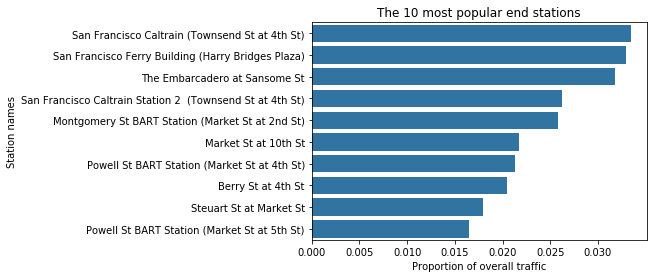

In [14]:
# create a bar chart with relative frequency for end_station_name focusing on the 10 stations most used 

# get proportion taken by most common group for derivation of tick marks
n_points = trips.shape[0]
max_count = trips['end_station_name'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
cat_order = trips['end_station_name'].value_counts().nlargest(10).index
sb.countplot(data = trips, y = 'end_station_name', color = base_color, order = cat_order)
plt.xticks(tick_props * n_points, tick_names)
plt.title('The 10 most popular end stations')
plt.xlabel('Proportion of overall traffic')
plt.ylabel('Station names');

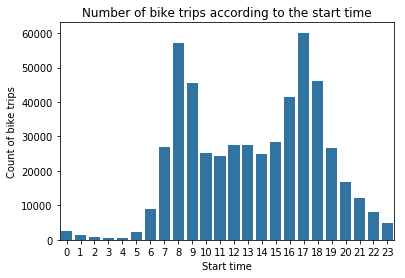

In [17]:
# group the trips dataframe by hour in the start_time column, make a count and turn it into a dataframe called start_hours
start_hours = trips.groupby(trips.start_time.dt.hour).size().reset_index(name='counts')
# create a bar chart 
sb.barplot(data = start_hours, x = 'start_time', y = 'counts', color = base_color)
plt.title('Number of bike trips according to the start time')
plt.xlabel('Start time')
plt.ylabel('Count of bike trips');

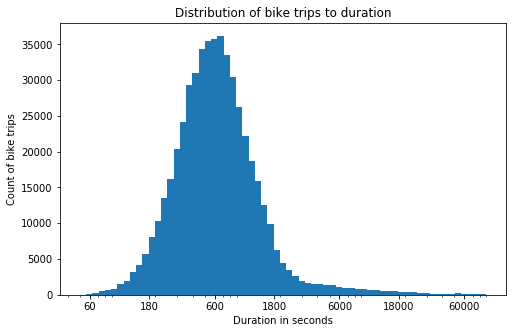

In [23]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(1.7, np.log10(trips['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60, 180, 600, 1800, 6000, 18000, 60000], [60, 180, 600, 1800, 6000, 18000, 60000])
plt.title('Distribution of bike trips to duration')
plt.xlabel('Duration in seconds')
plt.ylabel('Count of bike trips')
plt.show()

## Does the people that use this bike sharing service share similar characteristics?

The typical user is most likely a subscriber, male and between 30-35 years old.

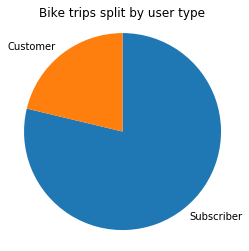

In [25]:
# create a pie chart with the counts in the user_type column 
sorted_counts_type = trips['user_type'].value_counts()
plt.pie(sorted_counts_type, labels = sorted_counts_type.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Bike trips split by user type');

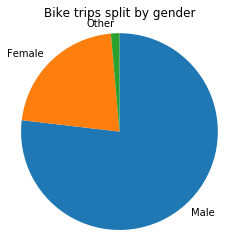

In [26]:
# create a pie chart with the counts in the member_gender column 
sorted_counts_gender = trips['member_gender'].value_counts()
plt.pie(sorted_counts_gender, labels = sorted_counts_gender.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Bike trips split by gender');

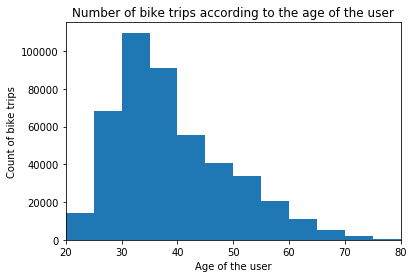

In [29]:
# create a column called member_age 
trips['member_age'] = 2019 - trips['member_birth_year']
# there is a long tail of user ages. Here I focus in on users with an age below 45 years old
# so that I can use a smaller bin size to get a more detailed look at the main data distribution.
bin_edges = np.arange(20, trips['member_age'].max()+1, 5)
plt.hist(data = trips, x = trips.member_age.dropna(), bins = bin_edges);
plt.xlim((20,80))
plt.title('Number of bike trips according to the age of the user')
plt.xlabel('Age of the user')
plt.ylabel('Count of bike trips');

## Are there relationships between user details and trip characteristics?

We have found a relationship between trip duration and user type: customers make much longer trips compared to subscribers. Approximately, customers have a median duration of 1000 seconds against 500 for the subscribers. 

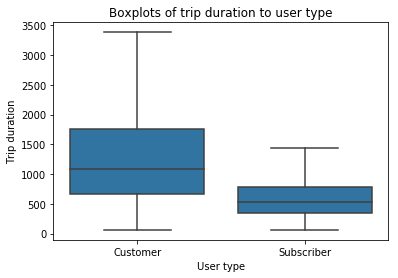

In [33]:
# create boxplots for duration/type hiding outliers (more than 1.5 times the IQR)
sb.boxplot(data = trips, x = 'user_type', y = 'duration_sec', color = base_color, showfliers = False)
plt.title('Boxplots of trip duration to user type')
plt.xlabel('User type')
plt.ylabel('Trip duration');

## Are there relationships between user details and trip characteristics?

We also have found a negative relationship between trip duration and user type which holds regardless of the user type or gender. Whether they are a subscriber/custoner or male/female, younger users make the longest trips and as the age of the customers increases, the trips get shorter in duration.

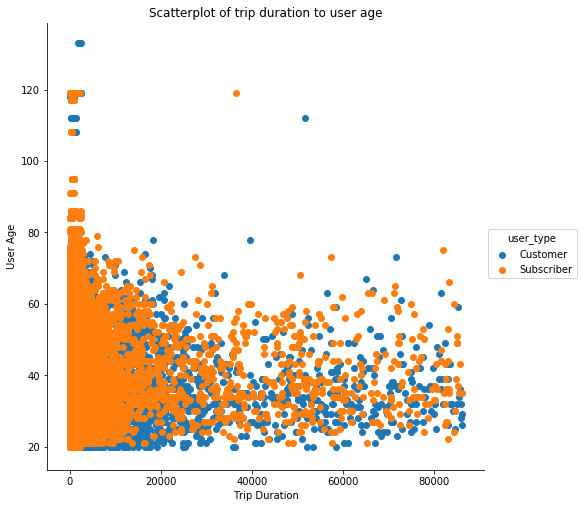

In [38]:
# create the same scatterplot as before but encoding the user type with color
g = sb.FacetGrid(data = trips, hue = 'user_type', size = 7)
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend()
plt.title('Scatterplot of trip duration to user age')
plt.xlabel('Trip Duration')
plt.ylabel('User Age');

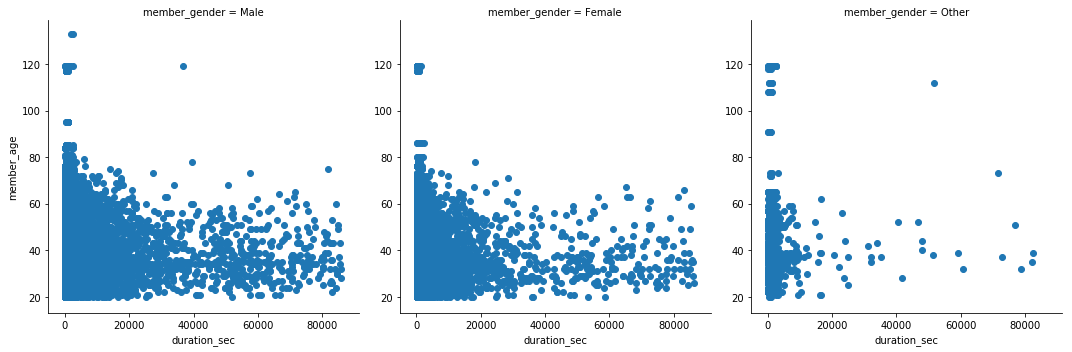

In [41]:
# create scatterplots for age and duration, faceting with gender
g = sb.FacetGrid(data = trips, col = 'member_gender', size = 5)
g.map(plt.scatter, 'duration_sec', 'member_age');

In [ ]:
!jupyter nbconvert explanatory_analysis.ipynb --to slides --post serve --template output_toggle